In [1]:
import baltic as bt
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

/Users/ricardorivero/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Number of nodes: 159
Number of leaves: 80


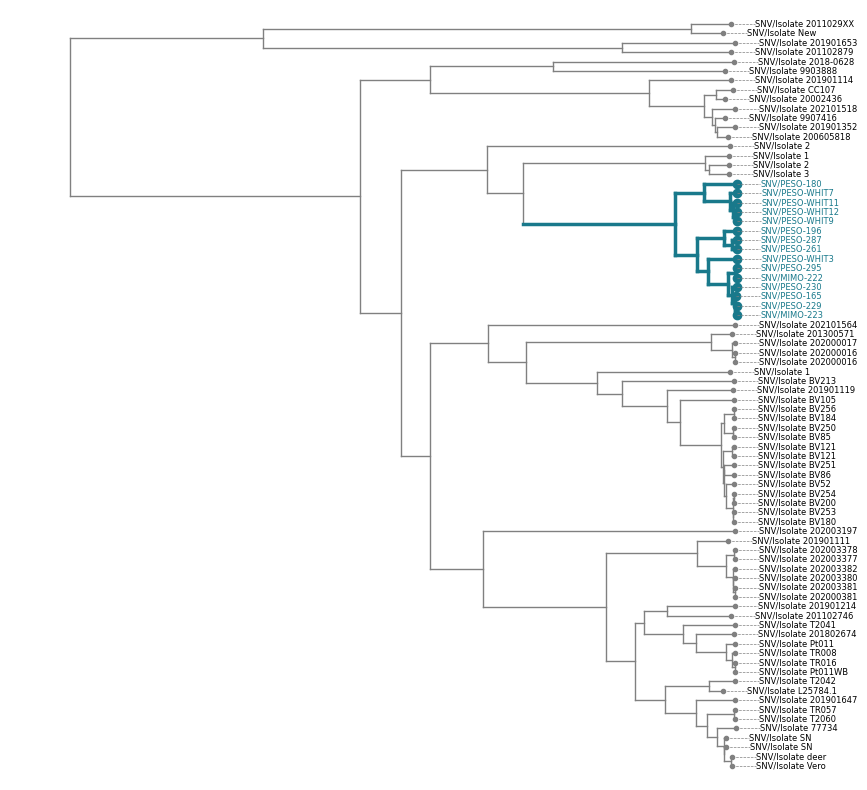

In [3]:
ll = bt.loadNexus('../Trees/SNV_S_NCBI_MEZAP.aligned.mcc.tree', absoluteTime=False)

# for k in ll.Objects:
#     k.absoluteTime = k.x    

print(f"Number of nodes: {len(ll.Objects)}")
print(f"Number of leaves: {len([k for k in ll.Objects if k.is_leaf()])}")

ll.setAbsoluteTime(2025.25)

tip_times = [k.absoluteTime for k in ll.Objects if k.is_leaf()]
min_tip_time = min(tip_times)
max_tip_time = max(tip_times)

# 1) Identify your SNVT tips
snvt_tips = [
    n for n in ll.Objects
    if n.is_leaf() and 'SNVT' in getattr(n, 'name', '')
]

# 2) Find their MRCA in ll
snvt_mrca = ll.commonAncestor(snvt_tips)

# 3) Build a helper to collect all descendants of a node
def collect_descendants(node, all_nodes):
    children = [n for n in all_nodes if n.parent is node]
    desc = []
    for c in children:
        desc.append(c)
        desc.extend(collect_descendants(c, all_nodes))
    return desc

#Create isolate atribute
pattern1 = re.compile(r'isolate\s+([A-Za-z0-9-*]+)')
pattern2 = re.compile(r'strain\s+([A-Za-z0-9]+)')

for k in ll.Objects:
    if k.is_leaf():
        if k.name in snvt_tips:
            k.traits['isolate'] = k.name
        else:
            m = pattern1.search(k.name)
            if m:
                k.traits['isolate'] = m.group(1)
            else:
                m = pattern2.search(k.name)
                if m:
                    k.traits['isolate'] = m.group(1)
                else:
                    k.traits['isolate'] = k.name

# 4) Make the set of nodes in that clade
snvt_clade_nodes = {snvt_mrca} | set(collect_descendants(snvt_mrca, ll.Objects))

whitman_color = "#19798b"

# 5) Define colour/width functions that refer back to ll’s own nodes
colour_func = lambda n: whitman_color   if n in snvt_clade_nodes else 'gray'
width_func  = lambda n: 2.5       if n in snvt_clade_nodes else 1

# 6) Re-plot the full tree, colouring branches in-place
fig, ax = plt.subplots(figsize=(10,10), facecolor='w')
ll.plotTree(
    ax,
    colour=colour_func,
    width=width_func,
    x_attr=lambda n: n.absoluteTime,
    y_attr=lambda n: n.y
)

# 7) (Optional) overlay tip markers & dashed labels as before
for tip in snvt_tips:
    ax.plot(tip.absoluteTime, tip.y, 'o', color=whitman_color, markersize=6)
    label_x = tip.absoluteTime + 50
    name = tip.name.split('_')[-3] + tip.name.split('_')[-2] + '-'+ tip.name.split('_')[-1] #if "WHIT" in tip.name else tip.name.split('_')[3] + '-'+ tip.name.split('_')[4]
    name = name.replace('SNVT','SNV/')
    name = name.replace('PEMA', 'PESO')
    name = name.replace('MIPE', 'MIMO')
    ax.plot([tip.absoluteTime, label_x],
            [tip.y,         tip.y],
            linestyle='--', color='gray', linewidth=0.5)
    ax.text(label_x, tip.y, name,
            fontsize=6, color=whitman_color, va='center')

    
for tip in ll.Objects:
    if tip.is_leaf() and tip not in snvt_tips:
        ax.plot(tip.absoluteTime, tip.y, 'o', color='gray', markersize=3)
        label_x = tip.absoluteTime + 50
        name = "SNV/" + 'Isolate ' + tip.traits['isolate']
        if '|' in name:
            name = name.split('|')[0]

        ax.plot([tip.absoluteTime, label_x],
                [tip.y, tip.y],
                linestyle='--', color='gray', linewidth=0.5)
        ax.text(label_x, tip.y, name, fontsize=6, color='k', va='center')




# 8) Clean up & zoom
for loc in ['top','right','left','bottom']:
    ax.spines[loc].set_visible(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
#eliminate ticks
ax.tick_params(axis='both', which='both', length=0)
#[ax.axvline(t,ls='--',lw=0.5,color='grey', zorder= -1) for t in range(600,2025,200)]
ax.set_xlim(500, max_tip_time + 100)
ax.set_ylim(-1, ll.ySpan + 1)


plt.savefig('SNVT_tree_S.jpeg', dpi=1200, bbox_inches='tight')
plt.savefig('SNVT_tree_S.svg', dpi=1200, bbox_inches='tight')
plt.show()

Number of nodes: 151
Number of leaves: 76


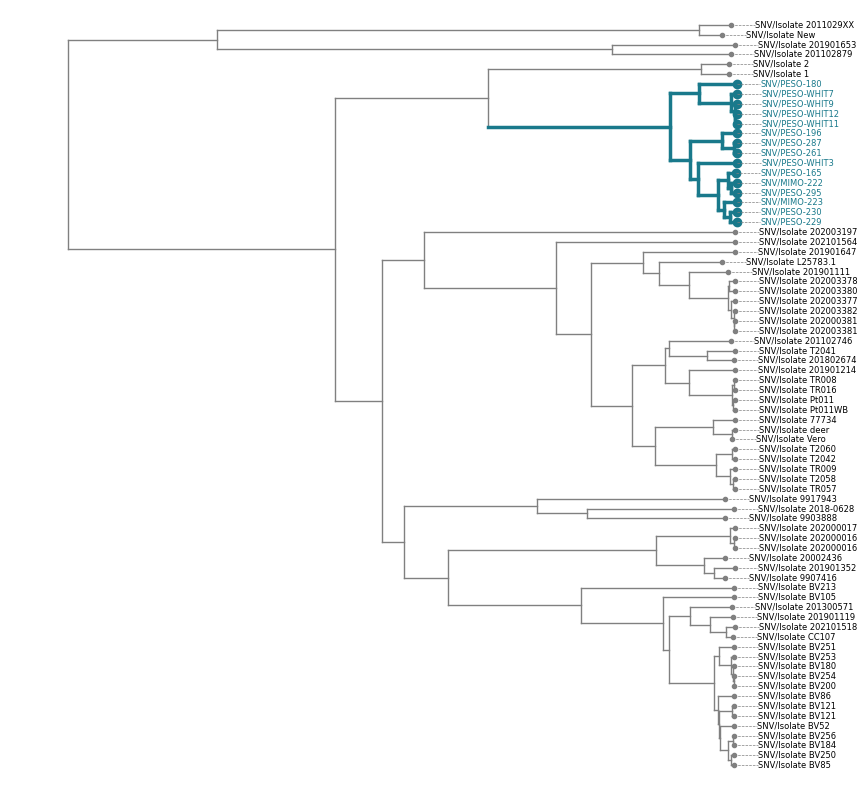

In [5]:
ll = bt.loadNexus('../Trees/SNV_M_NCBI_MEZAP.aligned.mcc.tree', absoluteTime=False)

# for k in ll.Objects:
#     k.absoluteTime = k.x    

print(f"Number of nodes: {len(ll.Objects)}")
print(f"Number of leaves: {len([k for k in ll.Objects if k.is_leaf()])}")

ll.setAbsoluteTime(2025.25)

tip_times = [k.absoluteTime for k in ll.Objects if k.is_leaf()]
min_tip_time = min(tip_times)
max_tip_time = max(tip_times)

# 1) Identify your SNVT tips
snvt_tips = [
    n for n in ll.Objects
    if n.is_leaf() and 'SNVT' in getattr(n, 'name', '')
]

# 2) Find their MRCA in ll
snvt_mrca = ll.commonAncestor(snvt_tips)

# 3) Build a helper to collect all descendants of a node
def collect_descendants(node, all_nodes):
    children = [n for n in all_nodes if n.parent is node]
    desc = []
    for c in children:
        desc.append(c)
        desc.extend(collect_descendants(c, all_nodes))
    return desc


#Create isolate atribute
pattern1 = re.compile(r'isolate\s+([A-Za-z0-9-*]+)')
pattern2 = re.compile(r'strain\s+([A-Za-z0-9]+)')

for k in ll.Objects:
    if k.is_leaf():
        if k.name in snvt_tips:
            k.traits['isolate'] = k.name
        else:
            m = pattern1.search(k.name)
            if m:
                k.traits['isolate'] = m.group(1)
            else:
                m = pattern2.search(k.name)
                if m:
                    k.traits['isolate'] = m.group(1)
                else:
                    k.traits['isolate'] = k.name

# 4) Make the set of nodes in that clade
snvt_clade_nodes = {snvt_mrca} | set(collect_descendants(snvt_mrca, ll.Objects))

whitman_color = "#19798b"

# 5) Define colour/width functions that refer back to ll’s own nodes
colour_func = lambda n: whitman_color   if n in snvt_clade_nodes else 'gray'
width_func  = lambda n: 2.5       if n in snvt_clade_nodes else 1

# 6) Re-plot the full tree, colouring branches in-place
fig, ax = plt.subplots(figsize=(10,10), facecolor='w')
ll.plotTree(
    ax,
    colour=colour_func,
    width=width_func,
    x_attr=lambda n: n.absoluteTime,
    y_attr=lambda n: n.y
)

# 7) (Optional) overlay tip markers & dashed labels as before
for tip in snvt_tips:
    ax.plot(tip.absoluteTime, tip.y, 'o', color=whitman_color, markersize=6)
    label_x = tip.absoluteTime + 50
    name = tip.name.split('_')[-3] + tip.name.split('_')[-2] + '-'+ tip.name.split('_')[-1] #if "WHIT" in tip.name else tip.name.split('_')[3] + '-'+ tip.name.split('_')[4]
    name = name.replace('SNVT','SNV/')
    name = name.replace('PEMA', 'PESO')
    name = name.replace('MIPE', 'MIMO')
    ax.plot([tip.absoluteTime, label_x],
            [tip.y,         tip.y],
            linestyle='--', color='gray', linewidth=0.5)
    ax.text(label_x, tip.y, name,
            fontsize=6, color=whitman_color, va='center')

    
for tip in ll.Objects:
    if tip.is_leaf() and tip not in snvt_tips:
        ax.plot(tip.absoluteTime, tip.y, 'o', color='gray', markersize=3)
        label_x = tip.absoluteTime + 50
        name = "SNV/" + 'Isolate ' + tip.traits['isolate']
        if '|' in name:
            name = name.split('|')[0]

        ax.plot([tip.absoluteTime, label_x],
                [tip.y, tip.y],
                linestyle='--', color='gray', linewidth=0.5)
        ax.text(label_x, tip.y, name, fontsize=6, color='k', va='center')



# 8) Clean up & zoom
for loc in ['top','right','left', 'bottom']:
    ax.spines[loc].set_visible(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', length=0)
#[ax.axvline(t,ls='--',lw=0.5,color='grey', zorder= -1) for t in range(600,2025,200)]
ax.set_xlim(500, max_tip_time + 100)
ax.set_ylim(-1, ll.ySpan + 1)


plt.savefig('SNVT_tree_M.jpeg', dpi=1200, bbox_inches='tight')
plt.savefig('SNVT_tree_M.svg', dpi=1200, bbox_inches='tight')
plt.show()

Number of nodes: 117
Number of leaves: 59
9903888
2018-0628
9917943
YMD9RR_8_SNVT_PEMA_WHIT11
YMD9RR_6_SNVT_PEMA_WHIT7
YMD9RR_7_SNVT_PEMA_WHIT9
YMD9RR_9_SNVT_PEMA_WHIT12
2DZNTT_3_3_SNVT_PEMA_180
YMD9RR_5_SNVT_PEMA_WHIT3
YMD9RR_4_SNVT_PEMA_295
2DZNTT_1_1_SNVT_MIPE_222
YMD9RR_1_SNVT_MIPE_223
2DZNTT_6_6_SNVT_PEMA_230
2DZNTT_2_2_SNVT_PEMA_165
2DZNTT_5_5_SNVT_PEMA_229
YMD9RR_2_SNVT_PEMA_261
YMD9RR_3_SNVT_PEMA_287
2DZNTT_4_4_SNVT_PEMA_196
201901352
200605818
CC107
AF425256.1 |Convict Creek 107 virus segment L
202101518
9907416
20002436
201300571
202000016
202000017
202000016
201901109
201901114
201901119
BV121
202003197
Vero
deer
77734
201901647
201901111
202003380
202000381
202003381
202003378
202003377
201901214
T2041
201802674
TR057
TR016
TR008
Pt011WB
Pt011
201102746
T2060
T2042
TR009
T2058
202101564
New


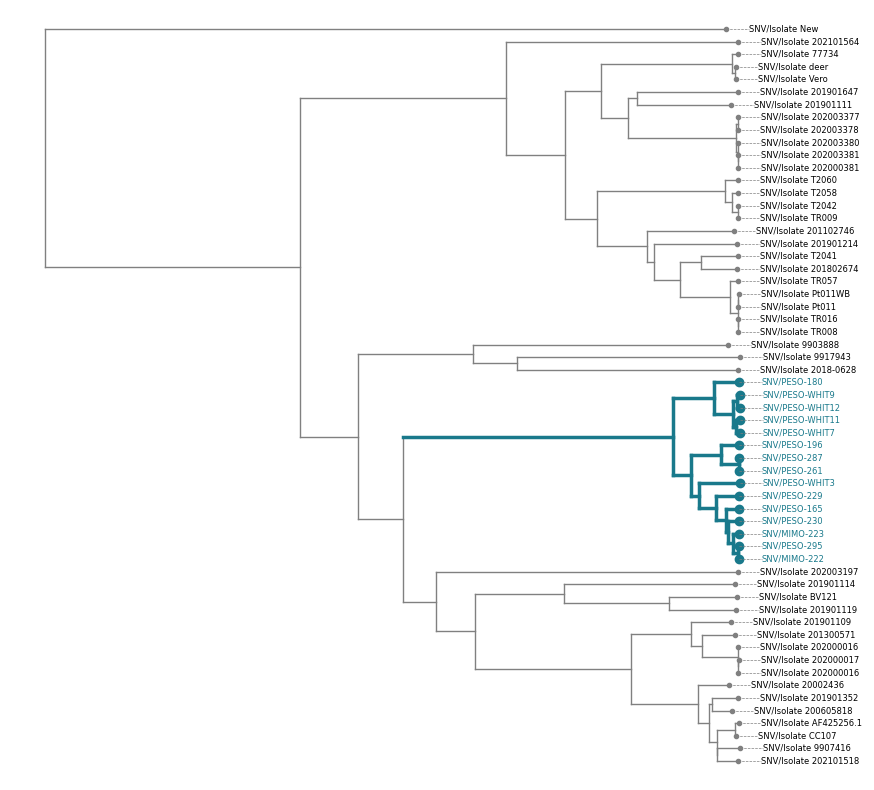

In [6]:
ll = bt.loadNexus('../Trees/SNV_L_NCBI_MEZAP.aligned.mcc.tree', absoluteTime=False)

import re

# for k in ll.Objects:
#     k.absoluteTime = k.x    

print(f"Number of nodes: {len(ll.Objects)}")
print(f"Number of leaves: {len([k for k in ll.Objects if k.is_leaf()])}")

ll.setAbsoluteTime(2025.25)

tip_times = [k.absoluteTime for k in ll.Objects if k.is_leaf()]
min_tip_time = min(tip_times)
max_tip_time = max(tip_times)

# 1) Identify SNVT tips
snvt_tips = [
    n for n in ll.Objects
    if n.is_leaf() and 'SNVT' in getattr(n, 'name', '')
]

#Create isolate atribute
pattern1 = re.compile(r'isolate\s+([A-Za-z0-9-*]+)')
pattern2 = re.compile(r'strain\s+([A-Za-z0-9]+)')

for k in ll.Objects:
    if k.is_leaf():
        if k.name in snvt_tips:
            k.traits['isolate'] = k.name
        else:
            m = pattern1.search(k.name)
            if m:
                k.traits['isolate'] = m.group(1)
            else:
                m = pattern2.search(k.name)
                if m:
                    k.traits['isolate'] = m.group(1)
                else:
                    k.traits['isolate'] = k.name


for k in ll.Objects:
    if k.is_leaf():
        print(k.traits['isolate'])
    

# 2) Find their MRCA in ll
snvt_mrca = ll.commonAncestor(snvt_tips)

# 3) collect all descendants of a node
def collect_descendants(node, all_nodes):
    children = [n for n in all_nodes if n.parent is node]
    desc = []
    for c in children:
        desc.append(c)
        desc.extend(collect_descendants(c, all_nodes))
    return desc

# 4) Make the set of nodes in that clade
snvt_clade_nodes = {snvt_mrca} | set(collect_descendants(snvt_mrca, ll.Objects))

whitman_color = "#19798b"

# 5) Define colour/width functions that refer back to ll’s own nodes
colour_func = lambda n: whitman_color   if n in snvt_clade_nodes else 'gray'
width_func  = lambda n: 2.5       if n in snvt_clade_nodes else 1

# 6) Re-plot the full tree, colouring branches in-place
fig, ax = plt.subplots(figsize=(10,10), facecolor='w')
ll.plotTree(
    ax,
    colour=colour_func,
    width=width_func,
    x_attr=lambda n: n.absoluteTime,
    y_attr=lambda n: n.y
)

# 7) (Optional) overlay tip markers & dashed labels as before
for tip in snvt_tips:
    ax.plot(tip.absoluteTime, tip.y, 'o', color=whitman_color, markersize=6)
    label_x = tip.absoluteTime + 50
    name = tip.name.split('_')[-3] + tip.name.split('_')[-2] + '-'+ tip.name.split('_')[-1] #if "WHIT" in tip.name else tip.name.split('_')[3] + '-'+ tip.name.split('_')[4]
    name = name.replace('SNVT','SNV/')
    name = name.replace('PEMA', 'PESO')
    name = name.replace('MIPE', 'MIMO')
    ax.plot([tip.absoluteTime, label_x],
            [tip.y,         tip.y],
            linestyle='--', color='gray', linewidth=0.5)
    ax.text(label_x, tip.y, name,
            fontsize=6, color=whitman_color, va='center')

    
for tip in ll.Objects:
    if tip.is_leaf() and tip not in snvt_tips:
        ax.plot(tip.absoluteTime, tip.y, 'o', color='gray', markersize=3)
        label_x = tip.absoluteTime + 50
        name = "SNV/" + 'Isolate ' + tip.traits['isolate']
        if '|' in name:
            name = name.split('|')[0]

        ax.plot([tip.absoluteTime, label_x],
                [tip.y, tip.y],
                linestyle='--', color='gray', linewidth=0.5)
        ax.text(label_x, tip.y, name, fontsize=6, color='k', va='center')



# 8) Clean up & zoom
for loc in ['top','right','left', 'bottom']:
    ax.spines[loc].set_visible(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', length=0)
#[ax.axvline(t,ls='--',lw=0.5,color='grey', zorder= -1) for t in range(600,2025,200)]
ax.set_xlim(400, max_tip_time + 100)
ax.set_ylim(-1, ll.ySpan + 1)


plt.savefig('SNVT_tree_L.jpeg', dpi=1200, bbox_inches='tight')
plt.savefig('SNVT_tree_L.svg', dpi=1200, bbox_inches='tight')
plt.show()

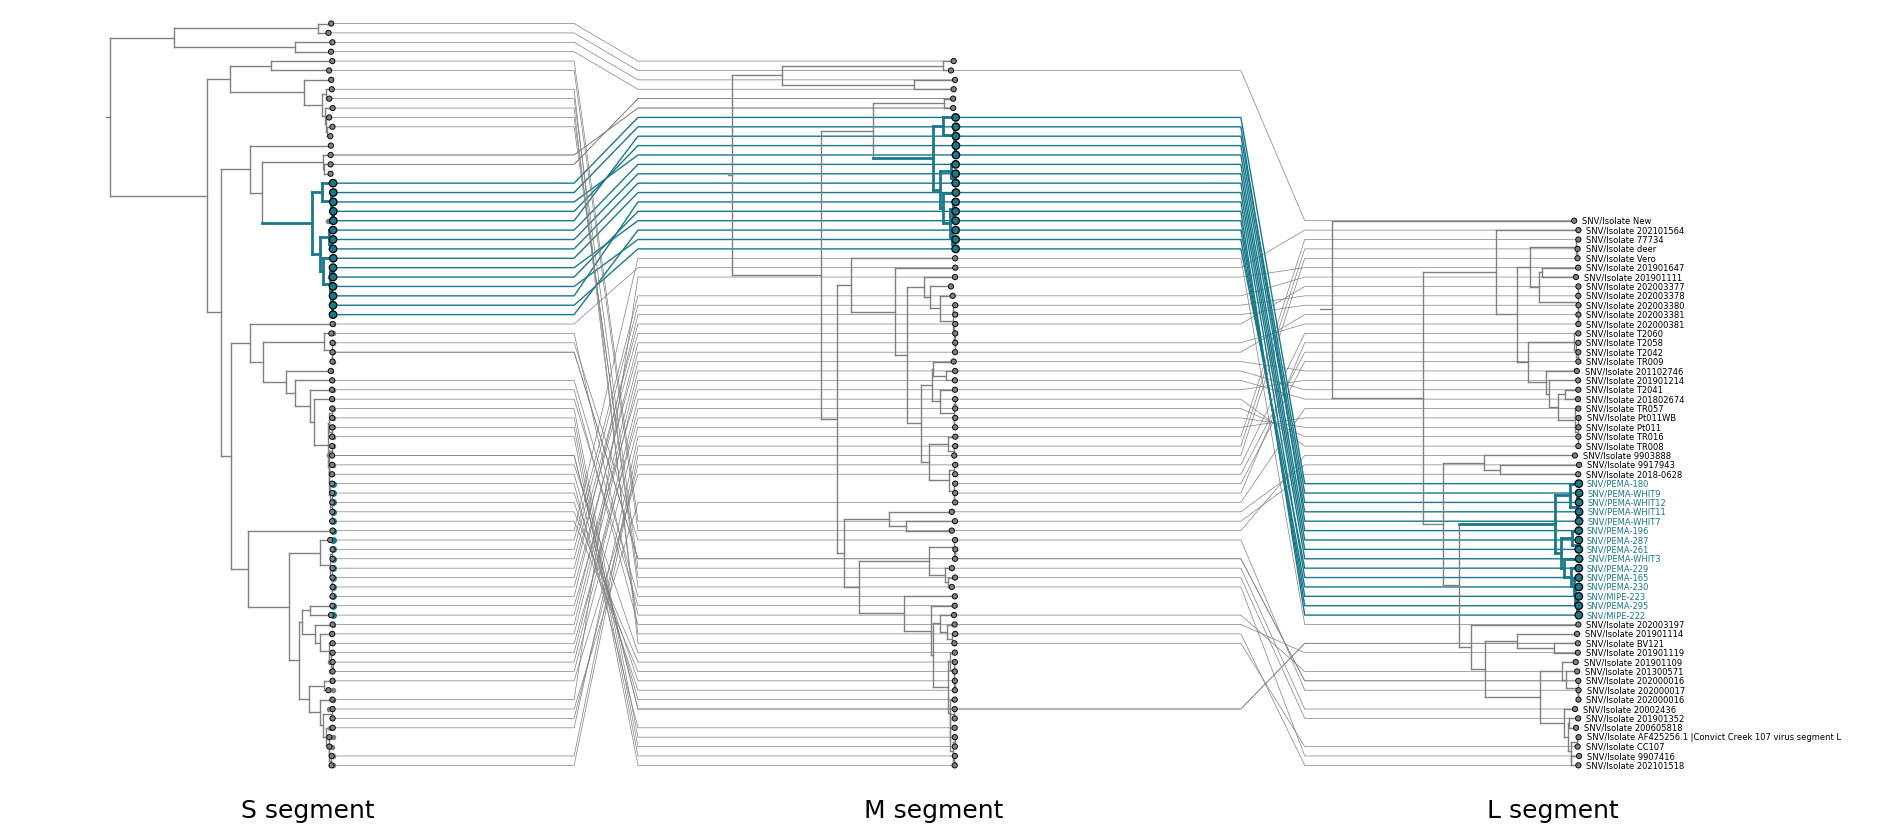

In [217]:
import os, re, matplotlib.pyplot as plt, matplotlib as mpl, baltic as bt

def safe_x(n):
    return n.absoluteTime if n.absoluteTime is not None else (n.x or 0)

def collect_descendants(node, objs):
    children = [n for n in objs if n.parent is node]
    out = children[:]
    for c in children:
        out.extend(collect_descendants(c, objs))
    return out

def highlight_clade(tree, key="SNVT"):
    tips = [n for n in tree.Objects if n.is_leaf() and key in n.name]
    mrca = tree.commonAncestor(tips)
    return {mrca} | set(collect_descendants(mrca, tree.Objects)), tips

def load_full_tree(path):
    t = bt.loadNexus(path, absoluteTime=False)
    t.setAbsoluteTime(2025.25)
    t.drawTree()
    return t

def annotate_snvt_tree(ax, snvt_tips, ll, whitman_color, x_attr):
    for tip in snvt_tips:
        ax.plot(tip.absoluteTime, tip.y, 'o', color=whitman_color, markersize=4)
        label_x = x_attr(tip) + 50
        name = tip.name.split('_')[-3] + tip.name.split('_')[-2] + '-' + tip.name.split('_')[-1]
        name = name.replace('SNVT', 'SNV/')
        ax.text(label_x, tip.y, name, fontsize=6, color=whitman_color, va='center')

    for tip in ll.Objects:
        if tip.is_leaf() and tip not in snvt_tips:
            ax.plot(tip.absoluteTime, tip.y, 'o', color='gray', markersize=3)
            label_x = x_attr(tip) + 50
            name = "SNV/" + 'Isolate ' + tip.traits['isolate']
            ax.text(label_x, tip.y, name, fontsize=6, color='k', va='center')

pat_iso = re.compile(r'isolate\s+([A-Za-z0-9\-]+)')
pat_str = re.compile(r'strain\s+([A-Za-z0-9\-]+)')
whit_col = "#19798b"

def plot_tanglegram(segments, base_dir, key="SNVT", displace=2500):
    trees = {
        s: load_full_tree(os.path.join(base_dir, f"SNV_{s}_NCBI_MEZAP.aligned.mcc.tree"))
        for s in segments
    }

    clade_map, tips_map = {}, {}
    for s, tr in trees.items():
        clade_map[s], tips_map[s] = highlight_clade(tr, key)

    for seg, tr in trees.items():
        for n in tr.Objects:
            if not n.is_leaf(): continue
            if n.name in tips_map[seg]:
                n.traits['isolate'] = n.name
            else:
                m = pat_iso.search(n.name) or pat_str.search(n.name)
                n.traits['isolate'] = m.group(1) if m else n.name

    tippos = {
        s: {n.traits['isolate']:(safe_x(n), n.y) for n in tr.Objects if n.branchType=="leaf"}
        for s, tr in trees.items()
    }

    cmap = mpl.cm.Spectral
    fig, ax = plt.subplots(figsize=(len(segments)*8, 10), facecolor='w')
    cum = 0

    for idx, seg in enumerate(segments):
        tr, nodes, tips = trees[seg], clade_map[seg], tips_map[seg]
        threshold = 600 if idx < 2 else 400
        x_attr = lambda n, c=cum, lb=threshold: max(safe_x(n), lb) + c
        y_attr = lambda n: n.y

        ax.text(cum+1450, -5, f'{seg} segment', fontsize=18)

        tr.plotTree(
            ax,
            colour=lambda n: whit_col if n in nodes else "gray",
            width=lambda n: 2 if n in nodes else 1,
            x_attr=x_attr,
            y_attr=y_attr,
            zorder=100
        )
        tr.plotPoints(
            ax,
            x_attr=x_attr,
            y_attr=y_attr,
            colour=lambda n: whit_col if "SNVT" in n.traits['isolate'] else "gray",
            size=lambda n: 20 if "SNVT" in n.traits['isolate'] else 10,
            zorder=101
        )

        if idx < len(segments)-1:
            nxt, off = segments[idx+1], cum + tr.treeHeight + displace
            hinge = (cum + tr.treeHeight + off) / (1.5 if idx == 0 else 1.7)
            for lf in tr.Objects:
                if lf.branchType != "leaf": continue
                iso = lf.traits['isolate']
                if iso not in tippos[nxt]: continue
                x0, y0 = tippos[seg][iso]
                x1, y1 = tippos[nxt][iso]
                x0 = max(x0, threshold) + cum
                x1 = x1 + off
                xs = [x0, hinge, hinge + 400, x1]
                ys = [y0, y0, y1, y1]
                col = whit_col if "SNVT" in iso else "gray"
                wt = 1 if "SNVT" in iso else 0.5
                ax.plot(xs, ys, lw=wt, color=col, zorder=0)

        if idx == len(segments) - 1:
            annotate_snvt_tree(ax, tips, tr, whit_col, x_attr)

        cum += tr.treeHeight + displace

    ax.set_xticks([]); ax.set_yticks([])
    for loc in ('top', 'right', 'left', 'bottom'):
        ax.spines[loc].set_visible(False)

    ax.set_xlim(min(safe_x for safe_x, _ in [] or [(0,0)]), cum - 200)
    ax.set_ylim(-1, trees[segments[0]].ySpan + 1)
    plt.savefig('SNVT_tanglegram.jpeg', dpi=1200, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    plot_tanglegram(["S", "M", "L"], base_dir="../Trees/")

130.66486462974058
140.92118211730758
150.22043780308695


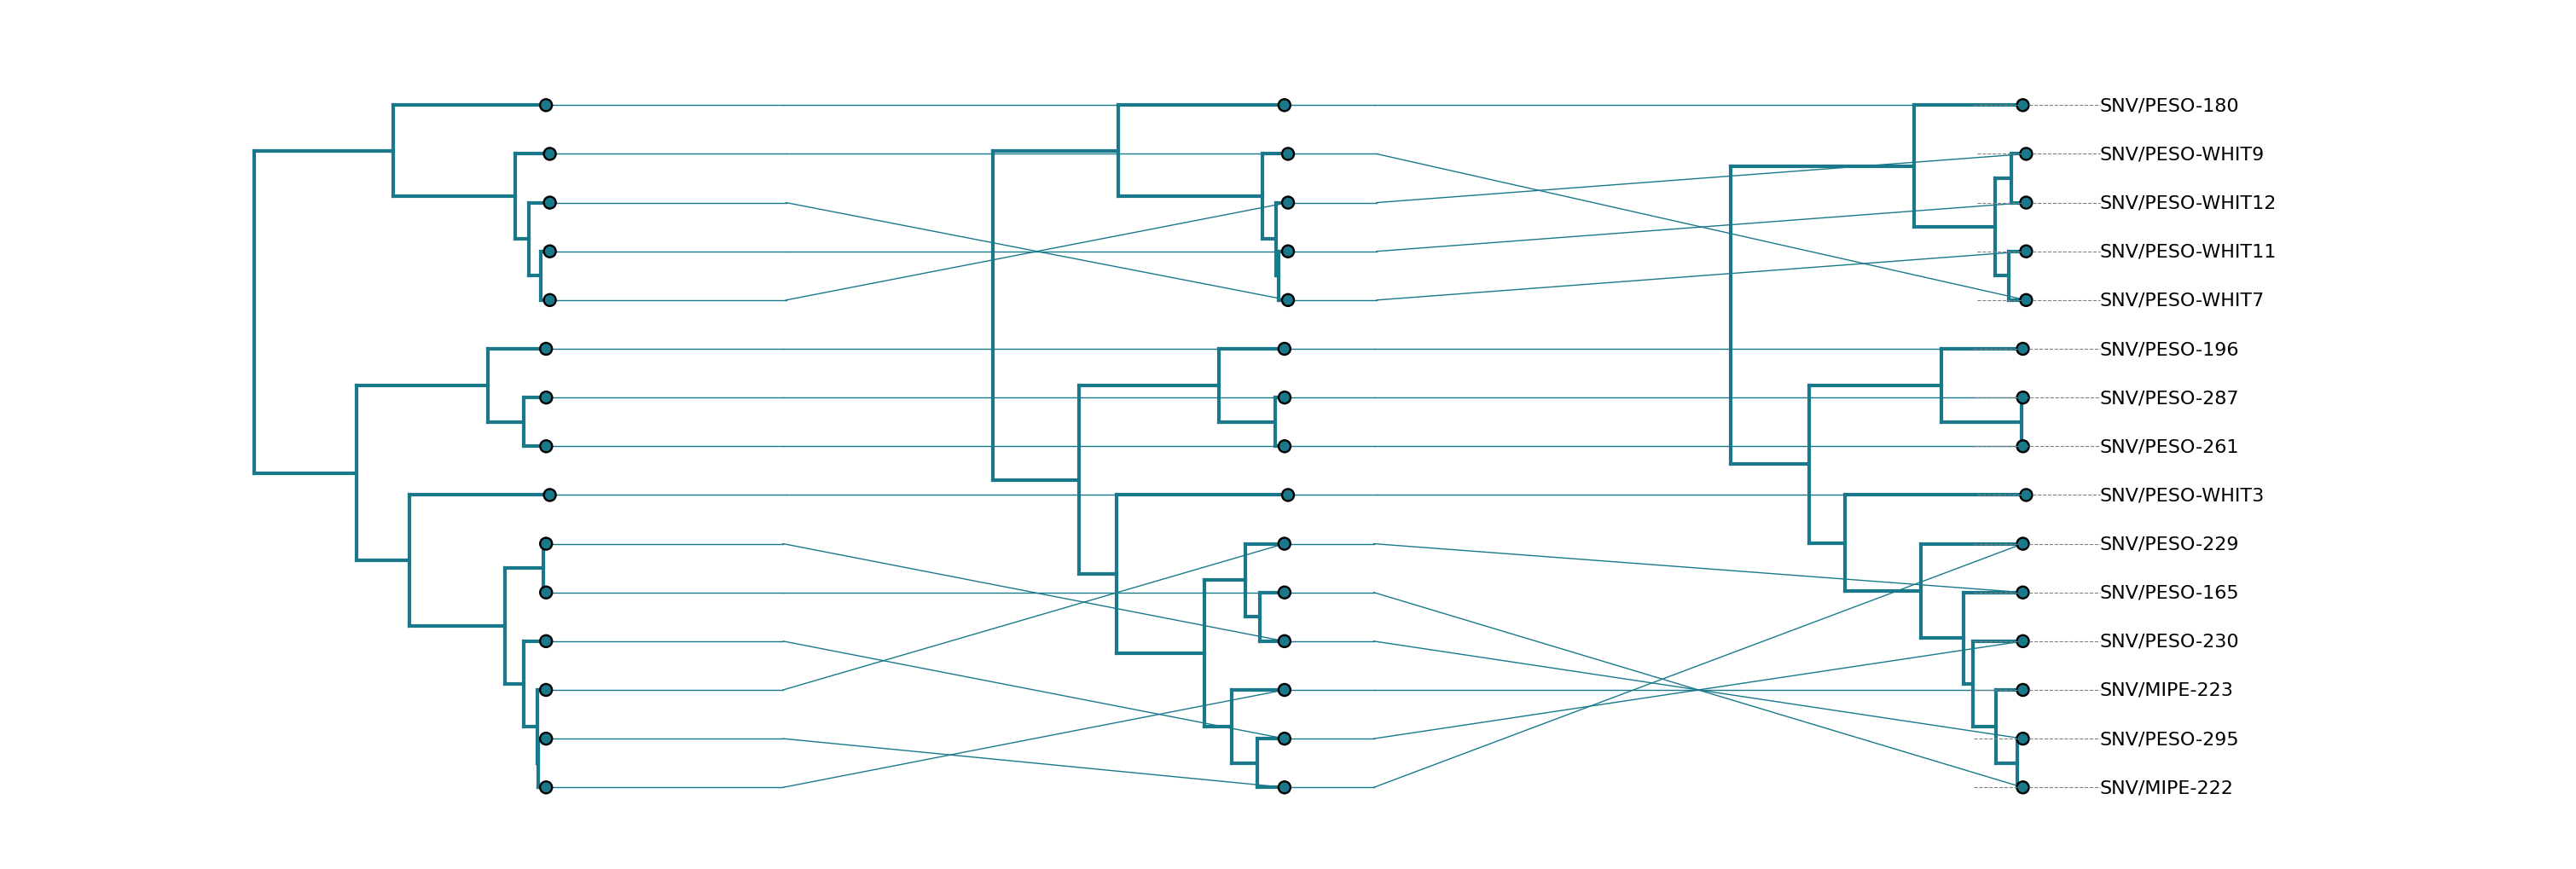

In [216]:
import baltic as bt
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import numpy as np

def scale_x(n, s, o):
    h = n.height
    if not n.is_leaf():
        h = h*1.2  # mildly expand internal depth
    else:
        h = h*1.2
    return h * s + o

whit_col = "#19798b"
tree_files = {
    'S': '../Trees/SNV_S_NCBI_MEZAP.aligned.mcc.tree',
    'M': '../Trees/SNV_M_NCBI_MEZAP.aligned.mcc.tree',
    'L': '../Trees/SNV_L_NCBI_MEZAP.aligned.mcc.tree'
}

# load and extract SNVT subtrees
subtrees = {}
for seg, path in tree_files.items():
    tree = bt.loadNexus(path, absoluteTime=False)
    tree.setAbsoluteTime(2025.25)
    tips = [n for n in tree.Objects if n.is_leaf() and "SNVT" in n.name]
    if not tips:
        continue
    mrca   = tree.commonAncestor(tips)
    st     = tree.subtree(mrca, stem=False)
    root_height = st.root.height
    for n in st.Objects:
        n.height -= root_height
    st.setAbsoluteTime(2025.25)
    st.drawTree()
    subtrees[seg] = st

# layout parameters
width_per_seg = 50.0
gap           = 100.0
segments      = ['S','M','L']

# compute scaling and offsets
scales  = {}
offsets = {}
cum = 0.0
for seg in segments:
    H = max(n.height for n in subtrees[seg].Objects)
    print(H)
    scales[seg]  = width_per_seg / H
    offsets[seg] = cum
    cum += width_per_seg + gap

fig, ax = plt.subplots(figsize=(30, 10), facecolor='w')

# plot trees
for seg in segments:
    st  = subtrees[seg]
    scl = scales[seg]
    off = offsets[seg]
    st.drawTree()

    st.plotTree(
        ax,
        colour=whit_col,
        width=3,
        x_attr=lambda n, s=scl, o=off: scale_x(n, s, o),
        y_attr=lambda n: n.y,
        zorder=2
    )
    st.plotPoints(
        ax,
        colour=whit_col,
        size=70,
        x_attr=lambda n, s=scl, o=off: scale_x(n, s, o),
        y_attr=lambda n: n.y,
        zorder=3
    )

    if seg == 'L':
        label_x = offsets['L'] + width_per_seg *1.5
        for tip in st.Objects:
            if not tip.is_leaf():
                continue
            x_tip = tip.height*scales['L'] + offsets['L']
            y_tip = tip.y
            ax.plot([x_tip, label_x], [y_tip, y_tip],
                    linestyle='--', color='gray', linewidth=0.8)
            lbl = ('SNV/' + tip.name.split('_')[-2] + '-' + tip.name.split('_')[-1]).replace('PEMA', 'PESO')
            ax.text(label_x, y_tip, lbl,
                    fontsize=16, color='k', va='center')

# draw connections
# draw connections
for A, B in zip(segments, segments[1:]):
    sA, sB = scales[A], scales[B]
    oA, oB = offsets[A], offsets[B]
    tipsA = {n.name: n for n in subtrees[A].Objects if n.is_leaf()}
    tipsB = {n.name: n for n in subtrees[B].Objects if n.is_leaf()}
    
    for name in set(tipsA) & set(tipsB):
        nA, nB = tipsA[name], tipsB[name]
        xA = scale_x(nA, sA, oA)
        yA = nA.y
        xB = scale_x(nB, sB, oB)
        yB = nB.y
        xm = (xA + xB) / 2.5
        
        ax.add_line(mlines.Line2D([xA, xm], [yA, yA],
                                  color=whit_col, lw=1, zorder=1))
        ax.add_line(mlines.Line2D([xm, xB], [yA, yB],
                                  color=whit_col, lw=1, zorder=1))

ax.set_xlim(-gap/2, cum+gap/5)
ax.set_ylim(-1, max(n.y for st in subtrees.values() for n in st.Objects) + 2)
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.axis('off')
fig.set_constrained_layout(False)
plt.tight_layout(pad=0)
plt.savefig('SNVT_subtree_tanglegram.jpeg', dpi=1200, bbox_inches='tight')
plt.show()

130.66486462974058
140.92118211730758
150.22043780308695


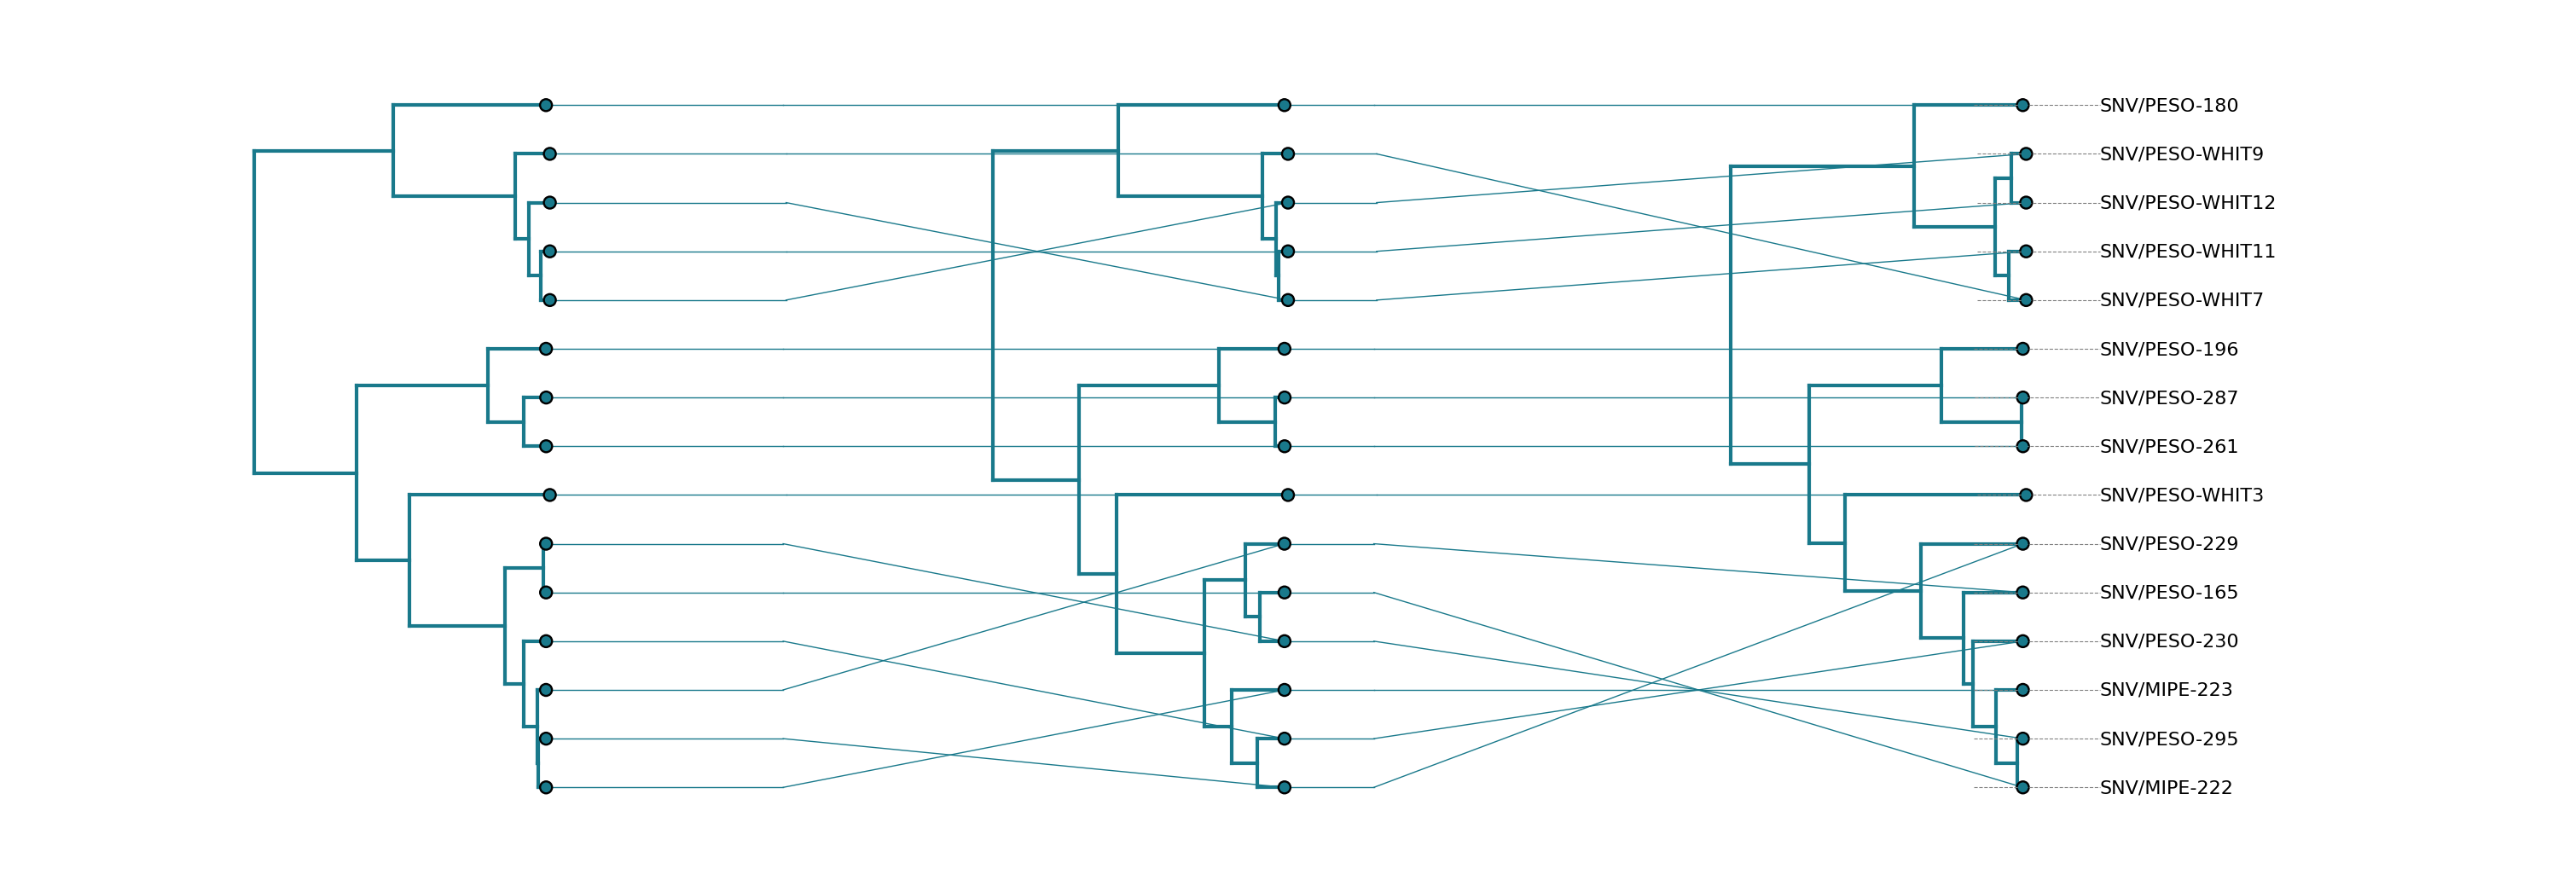

In [7]:
import baltic as bt
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import numpy as np

def scale_x(n, s, o):
    h = n.height
    if not n.is_leaf():
        h = h*1.2  # mildly expand internal depth
    else:
        h = h*1.2
    return h * s + o

whit_col = "#19798b"
tree_files = {
    'S': '../Trees/SNV_S_NCBI_MEZAP.aligned.mcc.tree',
    'M': '../Trees/SNV_M_NCBI_MEZAP.aligned.mcc.tree',
    'L': '../Trees/SNV_L_NCBI_MEZAP.aligned.mcc.tree'
}

# load and extract SNVT subtrees
subtrees = {}
for seg, path in tree_files.items():
    tree = bt.loadNexus(path, absoluteTime=False)
    tree.setAbsoluteTime(2025.25)
    tips = [n for n in tree.Objects if n.is_leaf() and "SNVT" in n.name]
    if not tips:
        continue
    mrca   = tree.commonAncestor(tips)
    st     = tree.subtree(mrca, stem=False)
    root_height = st.root.height
    for n in st.Objects:
        n.height -= root_height
    st.setAbsoluteTime(2025.25)
    st.drawTree()
    subtrees[seg] = st

# layout parameters
width_per_seg = 50.0
gap           = 100.0
segments      = ['S','M','L']

# compute scaling and offsets
scales  = {}
offsets = {}
cum = 0.0
for seg in segments:
    H = max(n.height for n in subtrees[seg].Objects)
    print(H)
    scales[seg]  = width_per_seg / H
    offsets[seg] = cum
    cum += width_per_seg + gap

fig, ax = plt.subplots(figsize=(30, 10), facecolor='w')

# plot trees
for seg in segments:
    st  = subtrees[seg]
    scl = scales[seg]
    off = offsets[seg]
    st.drawTree()

    st.plotTree(
        ax,
        colour=whit_col,
        width=3,
        x_attr=lambda n, s=scl, o=off: scale_x(n, s, o),
        y_attr=lambda n: n.y,
        zorder=2
    )
    st.plotPoints(
        ax,
        colour=whit_col,
        size=70,
        x_attr=lambda n, s=scl, o=off: scale_x(n, s, o),
        y_attr=lambda n: n.y,
        zorder=3
    )

    if seg == 'L':
        label_x = offsets['L'] + width_per_seg *1.5
        for tip in st.Objects:
            if not tip.is_leaf():
                continue
            x_tip = tip.height*scales['L'] + offsets['L']
            y_tip = tip.y
            ax.plot([x_tip, label_x], [y_tip, y_tip],
                    linestyle='--', color='gray', linewidth=0.8)
            lbl = ('SNV/' + tip.name.split('_')[-2] + '-' + tip.name.split('_')[-1]).replace('PEMA', 'PESO')
            ax.text(label_x, y_tip, lbl,
                    fontsize=16, color='k', va='center')

# draw connections
# draw connections
for A, B in zip(segments, segments[1:]):
    sA, sB = scales[A], scales[B]
    oA, oB = offsets[A], offsets[B]
    tipsA = {n.name: n for n in subtrees[A].Objects if n.is_leaf()}
    tipsB = {n.name: n for n in subtrees[B].Objects if n.is_leaf()}
    
    for name in set(tipsA) & set(tipsB):
        nA, nB = tipsA[name], tipsB[name]
        xA = scale_x(nA, sA, oA)
        yA = nA.y
        xB = scale_x(nB, sB, oB)
        yB = nB.y
        xm = (xA + xB) / 2.5
        
        ax.add_line(mlines.Line2D([xA, xm], [yA, yA],
                                  color=whit_col, lw=1, zorder=1))
        ax.add_line(mlines.Line2D([xm, xB], [yA, yB],
                                  color=whit_col, lw=1, zorder=1))

ax.set_xlim(-gap/2, cum+gap/5)
ax.set_ylim(-1, max(n.y for st in subtrees.values() for n in st.Objects) + 2)
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.axis('off')
fig.set_constrained_layout(False)
plt.tight_layout(pad=0)
plt.savefig('SNVT_subtree_tanglegram.svg', dpi=1200, bbox_inches='tight')
plt.show()